# Explore here

Column description
- Pregnancies. Number of pregnancies of the patient (numeric)
- Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
- BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)
- SkinThickness. Triceps skin fold thickness (measured in mm) (numeric)
- Insulin. 2-hour serum insulin (measured in mu U/ml) (numeric)
- BMI. Body mass index (numeric)
- DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)
- Age. Age of patient (numeric)
- Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1 positive (numeric)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

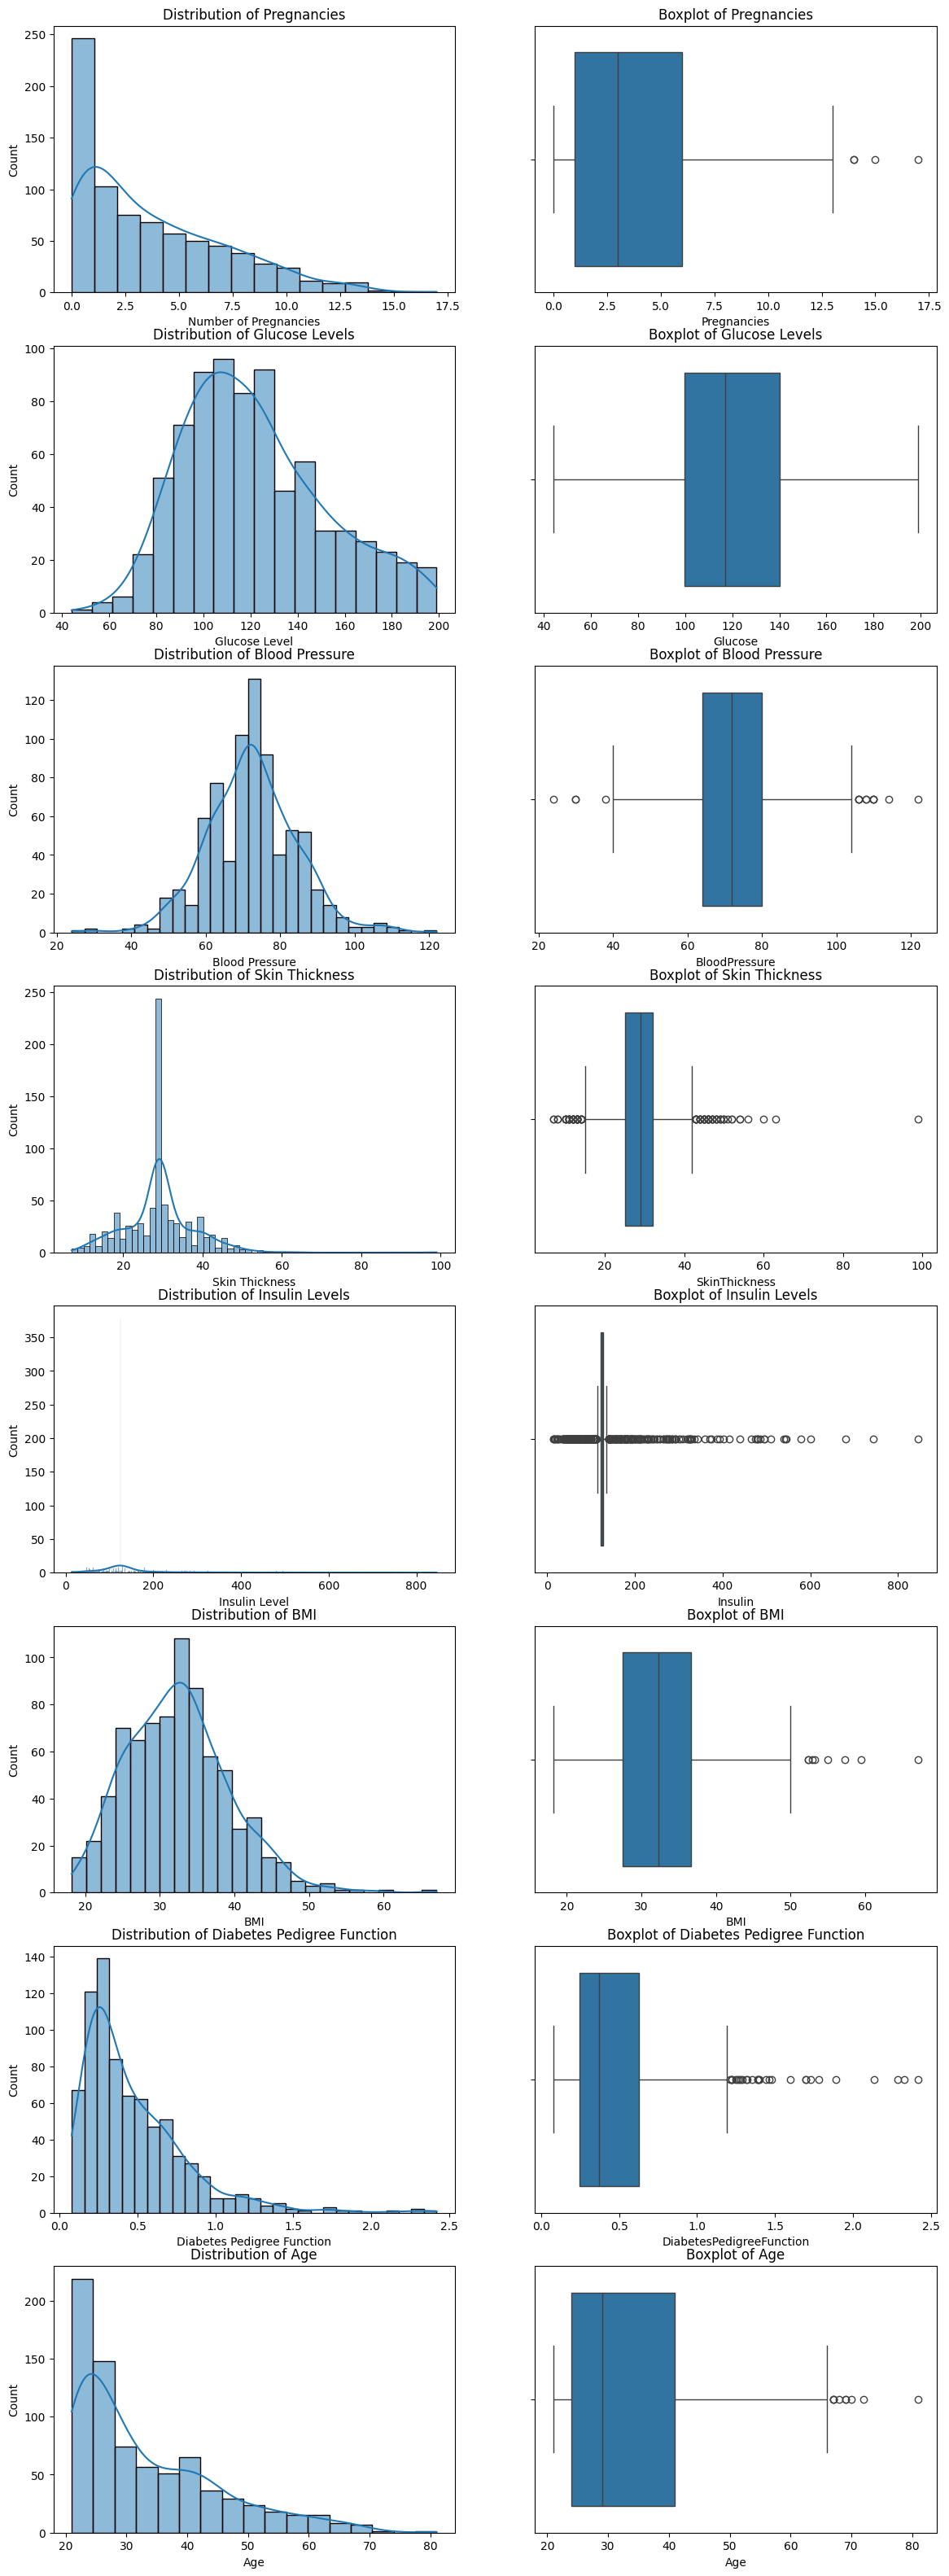

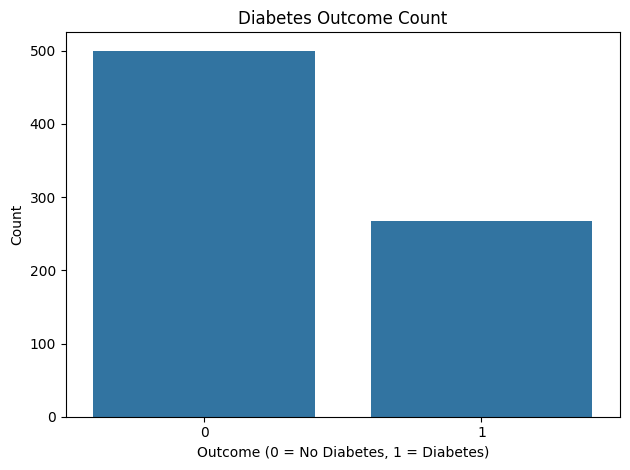

In [15]:
# Your code here
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diabetes_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
print(diabetes_data.head())
print(diabetes_data.info())
print(diabetes_data.describe())

# Handle duplicates
if diabetes_data.duplicated().sum() != 0:
    diabetes_data = diabetes_data.drop_duplicates()

# Handle outliers
invalid_zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[invalid_zero_columns] = diabetes_data[invalid_zero_columns].replace(0, np.nan)

for col in invalid_zero_columns:
    diabetes_data[col] = diabetes_data[col].fillna(diabetes_data[col].median())

# Handle null values
print(diabetes_data.isnull().sum())  
print(diabetes_data.describe())  

# Univariate analysis
fig, axis = plt.subplots(8,2, figsize=(14,40))
sns.histplot(ax=axis[0,0], data=diabetes_data, x='Pregnancies', kde=True)
axis[0,0].set_title("Distribution of Pregnancies")
axis[0,0].set_xlabel("Number of Pregnancies")
axis[0,0].set_ylabel("Count")
sns.boxplot(ax=axis[0,1], data=diabetes_data, x='Pregnancies')
axis[0,1].set_title("Boxplot of Pregnancies")
sns.histplot(ax=axis[1,0], data=diabetes_data, x='Glucose', kde=True)
axis[1,0].set_title("Distribution of Glucose Levels")
axis[1,0].set_xlabel("Glucose Level")
axis[1,0].set_ylabel("Count")
sns.boxplot(ax=axis[1,1], data=diabetes_data, x='Glucose')
axis[1,1].set_title("Boxplot of Glucose Levels")
sns.histplot(ax=axis[2,0], data=diabetes_data, x='BloodPressure', kde=True)
axis[2,0].set_title("Distribution of Blood Pressure")
axis[2,0].set_xlabel("Blood Pressure")
axis[2,0].set_ylabel("Count")
sns.boxplot(ax=axis[2,1], data=diabetes_data, x='BloodPressure')
axis[2,1].set_title("Boxplot of Blood Pressure")
sns.histplot(ax=axis[3,0], data=diabetes_data, x='SkinThickness', kde=True)
axis[3,0].set_title("Distribution of Skin Thickness")
axis[3,0].set_xlabel("Skin Thickness")
axis[3,0].set_ylabel("Count")
sns.boxplot(ax=axis[3,1], data=diabetes_data, x='SkinThickness')
axis[3,1].set_title("Boxplot of Skin Thickness")
sns.histplot(ax=axis[4,0], data=diabetes_data, x='Insulin', kde=True)
axis[4,0].set_title("Distribution of Insulin Levels")
axis[4,0].set_xlabel("Insulin Level")
axis[4,0].set_ylabel("Count")
sns.boxplot(ax=axis[4,1], data=diabetes_data, x='Insulin')
axis[4,1].set_title("Boxplot of Insulin Levels")
sns.histplot(ax=axis[5,0], data=diabetes_data, x='BMI', kde=True)
axis[5,0].set_title("Distribution of BMI")
axis[5,0].set_xlabel("BMI")
axis[5,0].set_ylabel("Count")
sns.boxplot(ax=axis[5,1], data=diabetes_data, x='BMI')
axis[5,1].set_title("Boxplot of BMI")
sns.histplot(ax=axis[6,0], data=diabetes_data, x='DiabetesPedigreeFunction', kde=True)
axis[6,0].set_title("Distribution of Diabetes Pedigree Function")
axis[6,0].set_xlabel("Diabetes Pedigree Function")
axis[6,0].set_ylabel("Count")
sns.boxplot(ax=axis[6,1], data=diabetes_data, x='DiabetesPedigreeFunction')
axis[6,1].set_title("Boxplot of Diabetes Pedigree Function")
sns.histplot(ax=axis[7,0], data=diabetes_data, x='Age', kde=True)
axis[7,0].set_title("Distribution of Age")
axis[7,0].set_xlabel("Age")
axis[7,0].set_ylabel("Count")
sns.boxplot(ax=axis[7,1], data=diabetes_data, x='Age')
axis[7,1].set_title("Boxplot of Age")

plt.figure()
sns.countplot(data=diabetes_data, x='Outcome')
plt.title("Diabetes Outcome Count")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()
